# Can we predict what makes a 'hit song'?

The third and final part to our analysis, this final notebook aims to use the dataset collected, and concatenated in the first to train a variety of regression models, in an attempt to identify answers to two main questions:

- What is(are) the most important factor(s) in producing a hit song?
- Can we with a respectable degree of accuracy 'predict' a hit?

A final question which will be left to fate, is even if we can train a model with respectable accuracy, will our predictions hold true? A wide and varied degree of external factors will define a song's commercial success, and this analysis only covers an artist's success on a single platform. While we deliver this analysis with confidence, it is important to consider enviormental factors which may lead to the poor age of our predictions.

**Disclaimer:** There's alot of stats stuff in this notebook, to skip all of the decision making regarding what model to use etc, you can skip to the predictions part of the notebook.


### Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading in our csv files
top_tracks_20_to_23 = pd.read_csv('topTracksOf2020to2023.csv')
new_april = pd.read_csv('newTracksApril.csv')

# Wrangling for the new dataset new_april
new_april['artist_genres'] = new_april['artist_genres'].apply(eval) 
new_april['artist_genre'] = new_april['artist_genres'].apply(lambda x: x[0] if x else None) 

# Dropping redundant API info to isolate variables we want to analyse
new_april.drop(columns=['Unnamed: 0', 'index_x', 'track_id', 'artist_id', 'artist_genres', 'index_y'], inplace = True)

new_april.reset_index(drop=True, inplace=True)
new_april.head(10)

,artist_name,track_name,track_popularity,artist_popularity,artist_followers,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_genre
0,PARTYNEXTDOOR,L o s e M y M i n d,62,79,6379963,0.433,0.477,-8.028,0.0448,0.05830,0.000018,0.228,0.144,170.312,183991,4.0,r&b
1,TINI,buenos aires,62,78,7685227,0.643,0.787,-4.586,0.0270,0.10400,0.000000,0.243,0.659,111.933,203114,4.0,latin pop
2,Fred again..,BerwynGesaffNeighbours,61,79,1392721,0.523,0.635,-9.001,0.1900,0.27500,0.411000,0.198,0.265,101.620,123608,4.0,edm
3,Feid,Fecha,59,91,10640880,0.686,0.791,-2.367,0.1200,0.09030,0.000000,0.218,0.722,195.997,188600,4.0,colombian pop
4,Dua Lipa,Illusion,57,88,43025907,0.679,0.772,-4.721,0.0472,0.02770,0.000003,0.106,0.709,126.964,188143,4.0,dance pop
5,Chris Brown,Go Girlfriend,57,87,21319200,0.634,0.736,-6.043,0.0616,0.01670,0.000000,0.125,0.559,187.850,175566,4.0,r&b
6,John Summit,EAT THE BASS,51,70,258946,0.684,0.785,-6.510,0.0483,0.00226,0.009290,0.119,0.408,127.971,202500,4.0,edm
7,Larry June,Imported Couches,50,64,369659,0.530,0.807,-8.000,0.3060,0.42600,0.000121,0.138,0.430,80.024,220500,4.0,cali rap
8,Suki Waterhouse,My Fun,49,69,630774,0.445,0.699,-5.217,0.1340,0.11500,0.002630,0.274,0.847,174.078,162291,4.0,indie pop
9,WILLOW,b i g f e e l i n g s,48,71,2495141,0.662,0.848,-4.298,0.0459,0.09070,0.000002,0.315,0.500,109.957,264133,1.0,afrofuturism


In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
new_april.describe()

,track_popularity,artist_popularity,artist_followers,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
mean,25.870,60.620,2901971.290,0.609,0.663,-6.761,0.096,0.224,0.065,0.168,0.459,125.528,192399.040,3.940
std,17.767,14.552,6963469.339,0.140,0.192,3.046,0.096,0.264,0.199,0.099,0.225,30.882,43894.336,0.371
min,0.000,32.000,5778.000,0.215,0.111,-18.617,0.025,0.000,0.000,0.026,0.036,62.688,73453.000,1.000
25%,10.000,50.000,78509.500,0.520,0.552,-7.978,0.035,0.026,0.000,0.106,0.284,101.933,161232.500,4.000
50%,24.500,60.000,246929.000,0.605,0.694,-6.022,0.050,0.106,0.000,0.130,0.460,125.969,188225.500,4.000
75%,41.000,70.250,1066518.750,0.709,0.810,-4.779,0.124,0.356,0.001,0.221,0.621,140.980,219059.000,4.000
max,62.000,93.000,43025907.000,0.944,0.985,-1.701,0.545,0.992,0.846,0.610,0.969,200.115,318652.000,5.000


In [4]:
top_tracks_20_to_23.describe()

,Unnamed: 0,track_popularity,artist_popularity,artist_followers,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chart_year
count,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000
mean,99.500,80.460,83.960,31608644.810,0.686,0.632,-6.138,0.095,0.250,0.015,0.176,0.508,122.360,199370.055,3.935,2021.500
std,57.879,7.835,9.126,31301883.795,0.134,0.144,1.953,0.087,0.247,0.081,0.131,0.227,29.164,45454.402,0.267,1.121
min,0.000,11.000,57.000,121062.000,0.332,0.192,-14.454,0.026,0.000,0.000,0.023,0.060,67.033,123987.000,3.000,2020.000
25%,49.750,76.000,78.000,5396442.750,0.584,0.537,-7.241,0.040,0.052,0.000,0.093,0.334,98.022,172996.000,4.000,2020.750
50%,99.500,81.000,85.000,21132055.000,0.704,0.661,-5.748,0.056,0.165,0.000,0.120,0.506,120.023,197286.500,4.000,2021.500
75%,149.250,85.000,90.000,43837343.750,0.788,0.730,-4.764,0.110,0.350,0.000,0.230,0.688,139.994,220239.750,4.000,2022.250
max,199.000,96.000,100.000,106532993.000,0.935,0.965,-2.810,0.487,0.934,0.657,0.790,0.958,203.759,613027.000,5.000,2023.000


Compared to our top_tracks_20_to_23 dataframe, since the new_april dataframe contains new tracks, expectedly track_popularity is lower on average, as the songs have had not the same amount of time to garner streams, shares, etc. Currently PARTYNEXTDOOR with their song 'L o s e M y M i n d' holds the top place with a 62 for track_popularity.

What this means is that to evaluate the efficacy of any model, we will have to train, test, and split on the intial 2020-2023 dataframe in order to ensure our model can predict with respectable accuracy.

### Radar Chart of New April song features

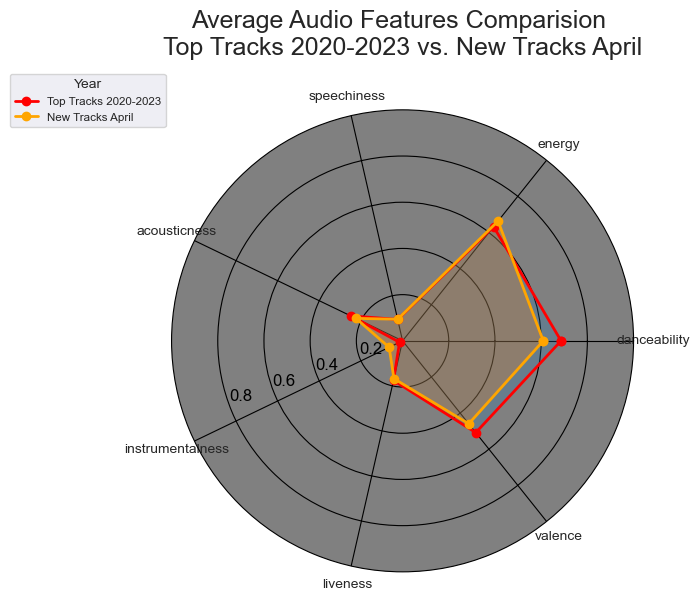

In [56]:
audio_features_april = new_april.loc[:,['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]
audio_features_top = top_tracks_20_to_23.loc[:,['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]
radar_labels = list(audio_features_april)[:]
radar_new_stats = audio_features_april.mean().tolist()
radar_hist_stats = audio_features_top.mean().tolist()

angles = np.linspace(0,2*np.pi, len(radar_labels), endpoint=False)

radar_new_stats = np.concatenate((radar_new_stats, [radar_new_stats[0]]))
radar_hist_stats = np.concatenate((radar_hist_stats, [radar_hist_stats[0]]))
angles = np.concatenate((angles,[angles[0]]))

# Plot for song features 2020 - 2023
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, radar_hist_stats, 'o-', linewidth=2, label="Top Tracks 2020-2023", color='red')
ax.fill(angles, radar_hist_stats, alpha=0.25)
ax.set_facecolor('grey')
ax.set_rlabel_position(200)
ax.spines['polar'].set_visible(True)  
ax.spines['polar'].set_color('black')
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="black", size=12)
plt.ylim(0,1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(radar_labels)

# Plot for new song features
ax.plot(angles, radar_new_stats, 'o-', linewidth=2, label="New Tracks April", color='orange')
ax.fill(angles, radar_new_stats, alpha=0.25)
ax.set_title('Average Audio Features Comparision \nTop Tracks 2020-2023 vs. New Tracks April', fontsize=18, pad=40)
ax.grid(True, color='black')

plt.legend(loc='best', bbox_to_anchor=(0., 0.59, 0, 0.5), title='Year', fontsize='small')
plt.show()

Generally, considering a simillar analysis in the previous notebook, the mean values of the audio features for tracks from 2020 to 2023 come to form a simillar shape we observed, and it seems that the new tracks of April follow suit. The most notable differences come in the form of slightly higher average instrumentalness from the new tracks, with lower levels of danceability and energy observed, although clearly minimal. However, the formula of popular music continues to be evidently songs posessing high energy, danceability, and valence (happiness or upbeatness of a track).

### Descriptive Exploration

In [6]:
# Function for exploring correlation
def corr_map(df, method, title):
    
    # Calculate correlation matrix
    correlation_map = df.corr(method=method)
    
    # Plot correlation heatmap
    plt.figure(figsize=(14, 6))
    corrmap = sns.heatmap(correlation_map, annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap='viridis', linewidths=1, linecolor='Black')
    corrmap.set_title(title)
    corrmap.set_xticklabels(corrmap.get_xticklabels(), rotation=90)

/var/folders/bs/_h1fsr8d6_g67rh2_kt902nm0000gn/T/ipykernel_83120/1475741650.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_map = df.corr(method=method)


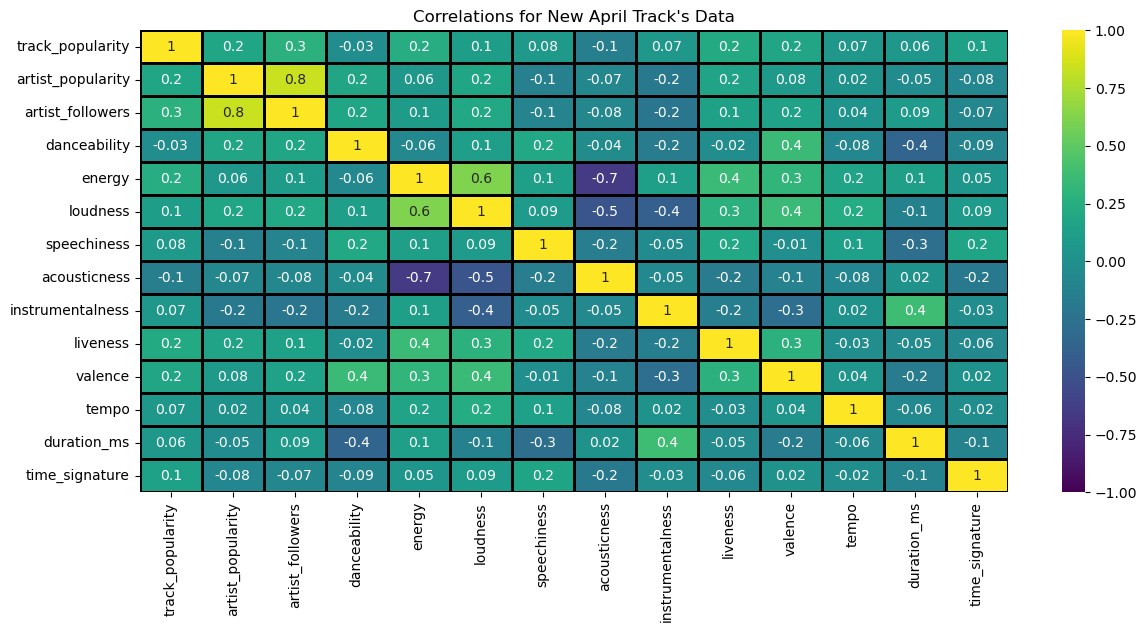

In [7]:
corr_map(new_april, 'spearman', 'Correlations for New April Track\'s Data')

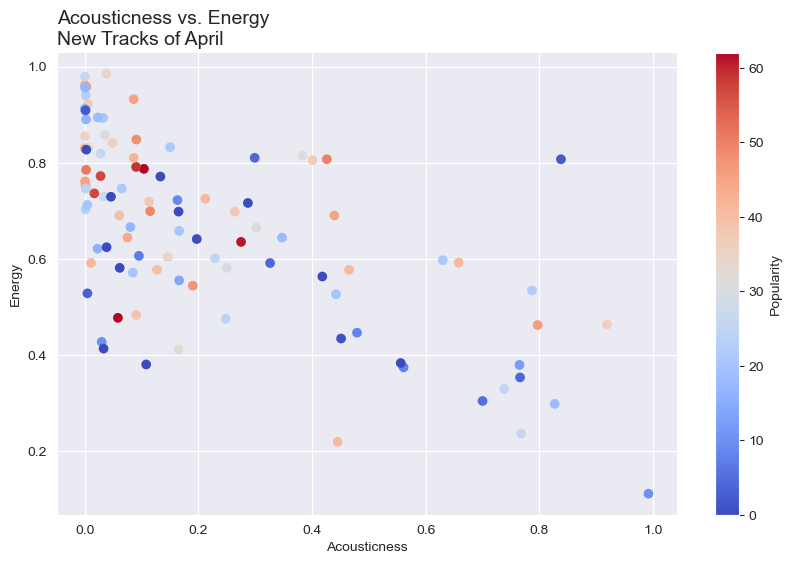

In [8]:
# Scatter for Acousticness vs. Energy - example of medium to strong negative correlation
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")  # Set the style to ggplot with a grey background
scatter = plt.scatter(data=new_april, x='acousticness', y='energy', c='track_popularity', cmap='coolwarm')
plt.colorbar(scatter, label='Popularity')
plt.title('Acousticness vs. Energy \nNew Tracks of April', loc='left', fontsize=14)
plt.xlabel('Acousticness')
plt.ylabel('Energy')
sns.despine()
plt.show()

Conducting a correlation analysis for the sole purpose of curiosity, in the same way we observed simillar audio feature averages, we can observe simillar trends in relationships as well. In the previous notebook, we observed a simillar negative correlation with the same two attributes, although not in the same strength. It may be that Spotify's playlists are continuosly suggesting the same genre/type of music, possibility contributing to pop's dominance.

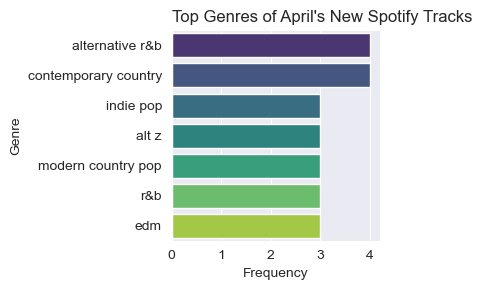

In [9]:
# New Tracks of April top Genres
genres_all = new_april['artist_genre']
top_genres = genres_all.value_counts().head(7)
plt.figure(figsize=(4, 3))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.title('Top Genres of April\'s New Spotify Tracks', loc='left')
plt.tight_layout()
plt.show()

None of the above genres came out to be the part of the top genres of the tracks we observed within our 2020 to 2023 dataset. It is to be considered from this analysis, while we attempt to predict popularity, ultimately we are prediciting the popularity of a sample of tracks released within a limited time frame within 2024. The purpose of this analysis is to provide insights on what could potentially make a hit song, and extracting the hits from this sample of new music is our goal.

### ML Modeling & Predictions
Models Used:
- Linear Regression
- Support Vector Regression
- XGBoost
- Random Forest Regressor

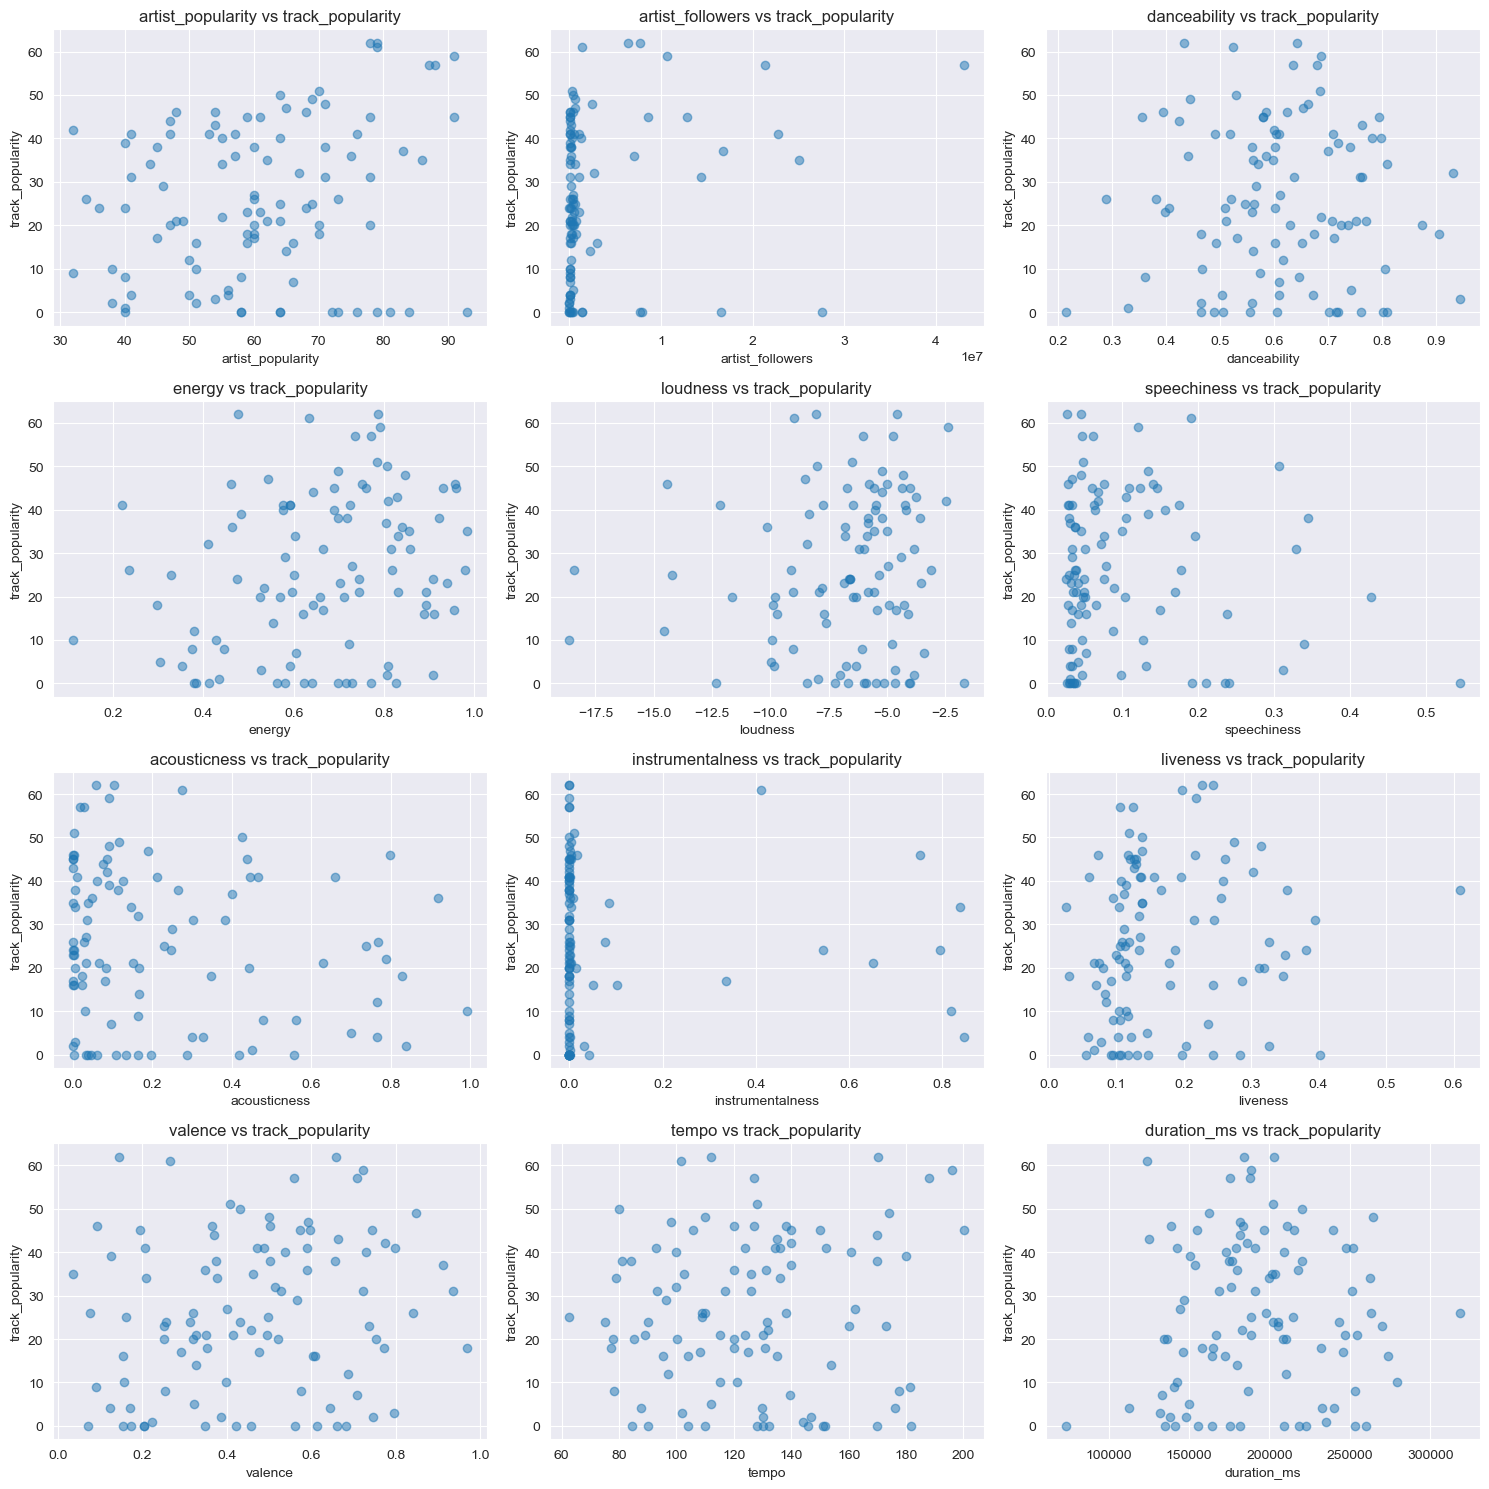

In [10]:
# Number features to plot
numeric_features = ['artist_popularity', 'artist_followers', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

# Axes
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flatten()

# Scatters against Popularity
for i, feature in enumerate(numeric_features):
    ax = axes[i]
    ax.scatter(new_april[feature], new_april['track_popularity'], alpha=0.5)
    ax.set_xlabel(feature)
    ax.set_ylabel('track_popularity')
    ax.set_title(f'{feature} vs track_popularity')

# Adjust layout
plt.tight_layout()
plt.show()

Observing the above we can see every numeric column and its relationship to track popularity. This is done in an attempt to understand wheter a linear or polynomial function would be better for modeling our data for predictions. From the above scatters, the correlation seems to be farily weak with most attributes, however, not necessarily polynomial. We attempt a linear regression first.

In [11]:
# Necessary ML Libraries

# Data Manipulation pre-modeling
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Models
!pip install xgboost
import xgboost as xgb
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.linear_model import HuberRegressor, RANSACRegressor
from sklearn.ensemble import RandomForestRegressor

# Evaluation Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [12]:
top_tracks_20_to_23.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'track_popularity',
       'artist_popularity', 'artist_followers', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature',
       'chart_year', 'artist_genre'],
      dtype='object')

In [13]:
# Features we will train on
X = np.asarray(top_tracks_20_to_23[['artist_popularity', 'artist_followers', 'danceability', 'acousticness', 'duration_ms']])
# X[0:5]

In [14]:
# 'instrumentalness', 'liveness', 'valence', 'tempo', 'energy', 'loudness', 'speechiness', 'time_signature'
# variables to be excluded after trial and error

In [15]:
# Feature we want to predict 'track_popularity'
y = np.asarray(top_tracks_20_to_23['track_popularity'])
# y[0:5]

In [16]:
# Dataset Normalization
X = preprocessing.StandardScaler().fit(X).transform(X)
# X[0:5]

In [17]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 5) (160,)
Test set: (40, 5) (40,)


In [18]:
# Initialize Multiple Linear Regression
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

# Predict
lr_yhat = lr.predict(X_test)

# Return Evaluation Metrics
print("Mean absolute error: %.2f" % np.mean(np.absolute(lr_yhat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((lr_yhat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test, lr_yhat))

# Return Intrecept & Coefficents
print("Intercept: ", lr.intercept_)
print("Coefficients:", lr.coef_)

Mean absolute error: 5.46
Residual sum of squares (MSE): 130.25
R2-score: 0.15
Intercept:  80.84963707868248
Coefficients: [ 2.66774792 -0.96438534 -2.27154497  0.42227914 -0.92817927]


Model predictions for popularity are off by on average 5.49 points. The RSE is high enough for major consideration. A 0.14 R squared value means the independent variables only capture 14% of the variance in the model, for reference a model is 'better' when this value is closer to 1. These are extremly poor, and before going forward with other models should be addressed.

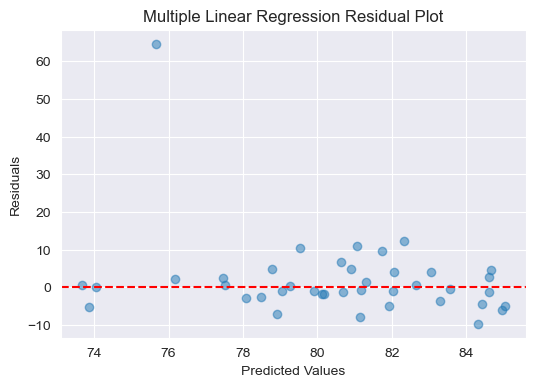

In [19]:
# Calculate residuals
residuals = lr_yhat - y_test

# Plot residuals against predicted values
plt.figure(figsize=(6, 4))
plt.scatter(lr_yhat, residuals, alpha=0.5)
plt.title('Multiple Linear Regression Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

A residual plot displays the difference between the actual observations and the predictions of a model. What the above shows is that the model can indeed by improved, as we have a y axis imbalance. To fix this I will transform our y variable, you will see in the above code I had transformed our X axis features but not the y.

Mean absolute error (log transformed): 0.10
Residual sum of squares (MSE) (log transformed): 0.10
R2-score (log transformed): 0.05


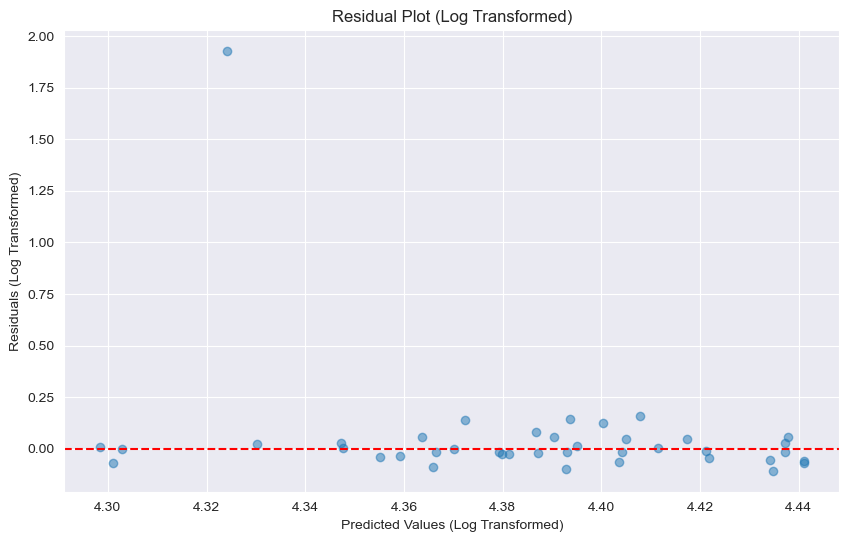

In [20]:
# Transform
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

# Initialize
lr_log = linear_model.LinearRegression()
lr_log.fit(X_train, y_train_log)

# Predict
lr_yhat_log = lr_log.predict(X_test)

# Evaluate
print("Mean absolute error (log transformed): %.2f" % np.mean(np.absolute(lr_yhat_log - y_test_log)))
print("Residual sum of squares (MSE) (log transformed): %.2f" % np.mean((lr_yhat_log - y_test_log) ** 2))
print("R2-score (log transformed): %.2f" % r2_score(y_test_log, lr_yhat_log))

# Plot residuals 
residuals_log = lr_yhat_log - y_test_log
plt.figure(figsize=(10, 6))
plt.scatter(lr_yhat_log, residuals_log, alpha=0.5)
plt.title('Residual Plot (Log Transformed)')
plt.xlabel('Predicted Values (Log Transformed)')
plt.ylabel('Residuals (Log Transformed)')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

Transformation of the y evidently actually produced poorer results.

In [21]:
# Initialize, Fit Huber
huber_model = HuberRegressor()
huber_model.fit(X_train, y_train)

# Predict Huber
huber_yhat = huber_model.predict(X_test)

# Initialize, Fit RANSAC
ransac_model = RANSACRegressor()
ransac_model.fit(X_train, y_train)

# Predict RANSAC
ransac_yhat = ransac_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate Huber
huber_mae = mean_absolute_error(y_test, huber_yhat)
huber_mse = mean_squared_error(y_test, huber_yhat)
huber_r2 = r2_score(y_test, huber_yhat)

print("Mean absolute error (Huber regression): %.2f" % huber_mae)
print("Residual sum of squares (MSE) (Huber regression): %.2f" % huber_mse)
print("R2-score (Huber regression): %.2f" % huber_r2)

# Evaluate RANSAC
ransac_mae = mean_absolute_error(y_test, ransac_yhat)
ransac_mse = mean_squared_error(y_test, ransac_yhat)
ransac_r2 = r2_score(y_test, ransac_yhat)

print("\nMean absolute error (RANSAC regression): %.2f" % ransac_mae)
print("Residual sum of squares (MSE) (RANSAC regression): %.2f" % ransac_mse)
print("R2-score (RANSAC regression): %.2f" % ransac_r2)

Mean absolute error (Huber regression): 5.47
Residual sum of squares (MSE) (Huber regression): 132.35
R2-score (Huber regression): 0.14

Mean absolute error (RANSAC regression): 6.40
Residual sum of squares (MSE) (RANSAC regression): 137.69
R2-score (RANSAC regression): 0.10


In [22]:
# Saving Linear Regression Evaluation Metrics
lr_mae = np.mean(np.absolute(lr_yhat - y_test))
lr_mse = np.mean((lr_yhat - y_test) ** 2)
lr_r2 = r2_score(y_test, lr_yhat)

After testing with mutiple different regression algorithm variations, despite the poor performance of the intial multiple regression we will save its output evaluation metrcis for comparison to other models.

In [23]:
# Standardize 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVR
svr_model = SVR(kernel='linear')  # You can specify different kernels like 'linear', 'poly', 'sigmoid', etc.

# Fit SVR 
svr_model.fit(X_train_scaled, y_train)

# Predict
svr_yhat = svr_model.predict(X_test_scaled)

# Evaluate
svr_mae = mean_absolute_error(y_test, svr_yhat)
svr_mse = mean_squared_error(y_test, svr_yhat)
svr_r2 = r2_score(y_test, svr_yhat)

print("Mean absolute error (SVR): %.2f" % svr_mae)
print("Residual sum of squares (MSE) (SVR): %.2f" % svr_mse)
print("R2-score (SVR): %.2f" % svr_r2)

Mean absolute error (SVR): 5.51
Residual sum of squares (MSE) (SVR): 132.90
R2-score (SVR): 0.13


In [24]:
# Initialize XGBoost 
xgb_model = xgb.XGBRegressor()

# Fit 
xgb_model.fit(X_train, y_train)

# Predit
xgb_yhat = xgb_model.predict(X_test)

# Evaluate
xgb_mae = mean_absolute_error(y_test, xgb_yhat)
xgb_mse = mean_squared_error(y_test, xgb_yhat)
xgb_r2 = r2_score(y_test, xgb_yhat)

print("Mean absolute error (XGBoost): %.2f" % xgb_mae)
print("Residual sum of squares (MSE) (XGBoost): %.2f" % xgb_mse)
print("R2-score (XGBoost): %.2f" % xgb_r2)

Mean absolute error (XGBoost): 5.37
Residual sum of squares (MSE) (XGBoost): 120.98
R2-score (XGBoost): 0.21


In [25]:
# Initialize
rf_regressor = RandomForestRegressor()

# Fit
rf_regressor.fit(X_train, y_train)

# Predict
rf_yhat = rf_regressor.predict(X_test)

# Evaluate
rf_mae = mean_absolute_error(y_test, rf_yhat)
rf_mse = mean_squared_error(y_test, rf_yhat)
rf_r2 = r2_score(y_test, rf_yhat)

print("Mean Absolute Error (Random Forest):", rf_mae)
print("Mean Squared Error (Random Forest):", rf_mse)
print("R-squared (Random Forest):", rf_r2)

Mean Absolute Error (Random Forest): 5.576499999999999
Mean Squared Error (Random Forest): 133.88026499999995
R-squared (Random Forest): 0.1251621408588759


### Making our Predictions for New April Tracks

In [26]:
# Dictionary for to make df for eval metrics
evaluation_data = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Huber Regression', 'RANSAC Regression', 'SVR'],
    'Mean Absolute Error': [lr_mae, rf_mae, xgb_mae, huber_mae, ransac_mae, svr_mae],
    'Mean Squared Error': [lr_mse, rf_mse, xgb_mse, huber_mse, ransac_mse, svr_mse],
    'R2-score': [lr_r2, rf_r2, xgb_r2, huber_r2, ransac_r2, svr_r2]
}

ml_eval_metrics = pd.DataFrame(evaluation_data)
ml_eval_metrics.set_index('Model', inplace=True)
ml_eval_metrics = ml_eval_metrics.sort_values(by='R2-score', ascending=False)
ml_eval_metrics

,Mean Absolute Error,Mean Squared Error,R2-score
Model,,,
XGBoost,5.371,120.979,0.209
Linear Regression,5.460,130.254,0.149
Huber Regression,5.466,132.354,0.135
SVR,5.509,132.897,0.132
Random Forest,5.576,133.880,0.125
RANSAC Regression,6.398,137.695,0.100


After multiple testing hours and immense trial and error, we have found the XGBoost model to be the most comprehensive algotithm for predicting on our dataset. Despite having a still rather poor R2-score of just above 0.2, the algortihm produced the best mean absolute error and mean squared error scores, as well as R2 score among the various models tested. 

Despite the poor account for variation, we must consider the small size of our dataset, and what this means for the quality of model output. With a set this small, and the problem we are tackling, our modest performance metrics may still hold value. Being able to predict the popularity score of a song with the limited number of features provided by the Spotify API, relevant to our problem, may indicate more features would need to be sourced for a replication of this analysis in future. 

In addition to this, our set of data is so small beacuse of the API limitations set by Spotify in the first place, hence the need to use the designated top 50 playlists for each year. Older data would have also likely produced predictions that do not embody modern trends.

Focusing on our mean absolute error (MAE), being able to predict the popularity score within just about 5 points of Spotify's own algortihms, with such a small set and most definitely simplier models comapred to the deep neural netwroks that exist within Spotify itself to process this data, is not a small feat.

For the purpose of predicting upon our new April tracklist, we will use the XGBoost algortithm to conclude our analysis, as it was performing the best out of all our models.

In [28]:
# Finding the feature importances
importances = xgb_model.feature_importances_
feature_names = ['artist_popularity', 'artist_followers', 'danceability', 'acousticness', 'duration_ms']
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance.set_index('Feature', inplace=True)
feature_importance

,Importance
Feature,
danceability,0.357
artist_popularity,0.184
duration_ms,0.184
acousticness,0.177
artist_followers,0.099


Using the XGBoost model as standard, based on our modeling, **wheter or not a song was danceable, the artist's popularity, and the song's duration were the most important factors in defining popularity.** Although our linear regression model proved inaccuracte, in referencing the coefficents of the equation, there were actually negative coefficents for danceability, and duration. Suggesting that less danceable, shorter songs, from artists who are consistently streamed on Spotify are the ones most responsible for the hits.

In [33]:
# Features we will train on
X_April = np.asarray(new_april[['artist_popularity', 'artist_followers', 'danceability', 'acousticness', 'duration_ms']])
# Feature we want to predict 'track_popularity'
y_April = np.asarray(top_tracks_20_to_23['track_popularity'])

# Initialize XGBoost 
xgb_April = xgb.XGBRegressor()

# Fit 
xgb_April.fit(X_April, y_April)

# Predictt
predictions = xgb_April.predict(X_April)

# Add predictions to the DataFrame
new_april['predicted_track_popularity'] = predictions
# sort by predictions
new_april_sorted = new_april.sort_values(by='predicted_track_popularity', ascending=False)

new_april_sorted.head(10)

,artist_name,track_name,track_popularity,artist_popularity,artist_followers,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_genre,predicted_track_popularity
0,PARTYNEXTDOOR,L o s e M y M i n d,62,79,6379963,0.433,0.477,-8.028,0.045,0.058,0.000,0.228,0.144,170.312,183991,4.000,r&b,96.000
1,TINI,buenos aires,62,78,7685227,0.643,0.787,-4.586,0.027,0.104,0.000,0.243,0.659,111.933,203114,4.000,latin pop,92.000
3,Feid,Fecha,59,91,10640880,0.686,0.791,-2.367,0.120,0.090,0.000,0.218,0.722,195.997,188600,4.000,colombian pop,91.001
2,Fred again..,BerwynGesaffNeighbours,61,79,1392721,0.523,0.635,-9.001,0.190,0.275,0.411,0.198,0.265,101.620,123608,4.000,edm,91.000
4,Dua Lipa,Illusion,57,88,43025907,0.679,0.772,-4.721,0.047,0.028,0.000,0.106,0.709,126.964,188143,4.000,dance pop,91.000
6,John Summit,EAT THE BASS,51,70,258946,0.684,0.785,-6.510,0.048,0.002,0.009,0.119,0.408,127.971,202500,4.000,edm,90.000
5,Chris Brown,Go Girlfriend,57,87,21319200,0.634,0.736,-6.043,0.062,0.017,0.000,0.125,0.559,187.850,175566,4.000,r&b,89.999
7,Larry June,Imported Couches,50,64,369659,0.530,0.807,-8.000,0.306,0.426,0.000,0.138,0.430,80.024,220500,4.000,cali rap,89.000
10,Dhruv,How?,47,65,613368,0.654,0.544,-8.508,0.034,0.190,0.001,0.138,0.593,98.087,182000,4.000,nyc pop,88.999
8,Suki Waterhouse,My Fun,49,69,630774,0.445,0.699,-5.217,0.134,0.115,0.003,0.274,0.847,174.078,162291,4.000,indie pop,88.999


In [34]:
top_tracks_20_to_23.head()

,Unnamed: 0,artist_name,track_name,track_popularity,artist_popularity,artist_followers,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chart_year,artist_genre
0,0,Taylor Swift,Cruel Summer,96,100,106430450,0.552,0.702,-5.707,0.157,0.117,0.000,0.105,0.564,169.994,178427,4.000,2023,pop
1,1,Noah Kahan,Stick Season,94,87,2571985,0.662,0.488,-6.894,0.068,0.782,0.000,0.102,0.817,117.913,182347,4.000,2022,pov: indie
2,2,Arctic Monkeys,I Wanna Be Yours,92,86,24058026,0.464,0.417,-9.345,0.026,0.136,0.022,0.097,0.479,67.528,183956,4.000,2023,garage rock
3,3,Harry Styles,As It Was,91,85,31662371,0.520,0.731,-5.338,0.056,0.342,0.001,0.311,0.662,173.930,167303,4.000,2022,pop
4,4,The Weeknd,Starboy,91,95,81435797,0.679,0.587,-7.015,0.276,0.141,0.000,0.137,0.486,186.003,230453,4.000,2023,canadian contemporary r&b


Simillar to when we first launched our dataframe, the top predicted track by popularity is slated to be 'L o s e M y M i n d' by PARTYNEXTDOOR with a possible rating of 96 according to our predictions. This is on par in terms of popularity with Taylor Swift's 2023 track, 'Cruel Summer.' 

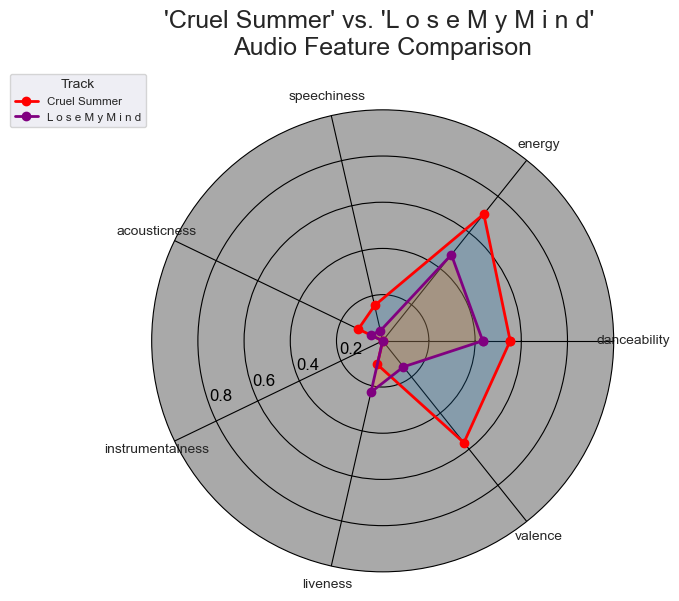

In [58]:
audio_features_april = new_april_sorted.loc[:,['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]
audio_features_top = top_tracks_20_to_23.loc[:,['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]
radar_labels = list(audio_features_top)[:]
radar_PND_stats = audio_features_april.iloc[0].tolist()
radar_TS_stats = audio_features_top.iloc[0].tolist()

angles2 = np.linspace(0,2*np.pi, len(radar_labels), endpoint=False)

radar_PND_stats = np.concatenate((radar_PND_stats, [radar_PND_stats[0]]))
radar_TS_stats = np.concatenate((radar_TS_stats, [radar_TS_stats[0]]))
angles2 = np.concatenate((angles,[angles[0]]))

# Plot for Cruel Summer
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, radar_TS_stats, 'o-', linewidth=2, label="Cruel Summer", color='red')
ax.fill(angles, radar_TS_stats, alpha=0.25)
ax.set_facecolor('darkgrey')
ax.set_rlabel_position(200)
ax.spines['polar'].set_visible(True)  
ax.spines['polar'].set_color('black')
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="black", size=12)
plt.ylim(0,1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(radar_labels)

# Plot for L o s e M y M i n d
ax.plot(angles, radar_PND_stats, 'o-', linewidth=2, label="L o s e M y M i n d", color='purple')
ax.fill(angles, radar_PND_stats, alpha=0.25)
ax.set_title('\'Cruel Summer\' vs. \'L o s e M y M i n d\' \nAudio Feature Comparison', fontsize=18, pad=40)
ax.grid(True, color='black')

plt.legend(loc='best', bbox_to_anchor=(0., 0.59, 0, 0.5), title='Track', fontsize='small')
plt.show()

As observed in previous examination, songs generally posessing high energy, danceability, and valence tend to produce better results when it comes to Spotify popularity. While Taylor Swift's 'Cruel Summer' fits this bill, more typically, PARTYNEXTDOOR's (PND) track seems to be a sadder track overall (low valence).

Of course we know music doesn't have to necesarily have to be happy in order to for it to be popular, but this difference in audio feature split can also be explained by genre. Taylor Swift operates in pop whilst PND operates within R&b. After all we still do have 8 months left of the year, but as time goes on PND's 'L o s e M y M i n d' is definitely one to look out for!